# my-project-life-insurance

Use the "Run" button to execute the code.

The data is from the kaggle competition [Prudential Life Insurance Assessment](https://www.kaggle.com/c/prudential-life-insurance-assessment/overview) 

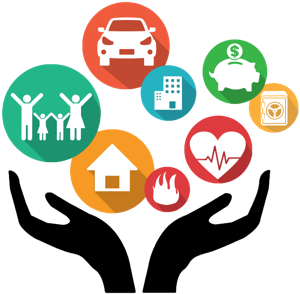Picture this. You are a data scientist in a start-up culture with the potential to have a very large impact on the business. Oh, and you are backed up by a company with 140 years' business experience.

Curious? Great! You are the kind of person we are looking for.

Prudential, one of the largest issuers of life insurance in the USA, is hiring passionate data scientists to join a newly-formed Data Science group solving complex challenges and identifying opportunities. The results have been impressive so far but we want more. 

The Challenge
In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.

The result? People are turned off. That’s why only 40% of U.S. households own individual life insurance. Prudential wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

By developing a predictive model that accurately classifies risk using a more automated approach, you can greatly impact public perception of the industry.

The results will help Prudential better understand the predictive power of the data points in the existing assessment, enabling us to significantly streamline the process.

# Installing the required libraries

In [2]:
!pip install jovian pandas numpy plotly matplotlib seaborn --quiet

In [3]:
!pip install opendatasets xgboost scikit-learn xgboost --upgrade --quiet --user

In [4]:
!pip install opendatasets --upgrade --quiet

Downloading the required data from Kaggle.

In [5]:
import opendatasets as od

In [6]:
od.download('https://www.kaggle.com/c/prudential-life-insurance-assessment')

Skipping, found downloaded files in ".\prudential-life-insurance-assessment" (use force=True to force download)


Extracting the csv files from zip files using Zipfile library

In [7]:
import os
os.listdir('prudential-life-insurance-assessment')

['sample_submission.csv.zip', 'test.csv.zip', 'train.csv.zip']

In [8]:
!pip install zipfile
from io import BytesIO
from zipfile import ZipFile
z=ZipFile('prudential-life-insurance-assessment/train.csv.zip')
z.extractall()

ERROR: Could not find a version that satisfies the requirement zipfile
ERROR: No matching distribution found for zipfile


In [9]:
z=ZipFile('prudential-life-insurance-assessment/test.csv.zip')
z.extractall()

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\user\\test.csv'

In [ ]:
z=ZipFile('prudential-life-insurance-assessment/sample_submission.csv.zip')
z.extractall()

Importing Pandas to create a dataframe from the csv files.

In [10]:
import pandas as pd
raw_df=pd.read_csv('train.csv')

In [11]:
pd.options.display.max_info_columns=200

In [12]:
raw_df

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8


In [13]:
test_df=pd.read_csv('test.csv')
test_df

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
0,1,1,D3,26,0.487179,2,3,1,0.611940,0.781818,...,0,0,0,0,0,0,0,0,0,0
1,3,1,A2,26,0.076923,2,3,1,0.626866,0.727273,...,0,0,0,0,0,0,0,0,0,0
2,4,1,D3,26,0.144667,2,3,1,0.582090,0.709091,...,0,0,0,0,0,0,0,0,0,0
3,9,1,A1,26,0.151709,2,1,1,0.522388,0.654545,...,0,0,0,0,0,0,0,0,1,1
4,12,1,A1,26,0.076923,2,3,1,0.298507,0.672727,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19760,79093,1,D3,26,0.128205,2,3,1,0.537313,0.636364,...,0,0,0,0,0,0,0,0,0,0
19761,79099,1,D4,10,0.230769,2,3,1,0.134328,0.618182,...,0,0,0,0,0,0,0,0,0,0
19762,79102,1,A2,26,0.076923,2,3,1,0.850746,0.727273,...,0,0,0,0,0,0,0,0,0,0
19763,79125,1,D1,26,0.487179,2,3,1,0.522388,0.745455,...,0,0,0,0,0,0,0,0,0,0


In [14]:
submission_df=pd.read_csv('sample_submission.csv')
submission_df

,Id,Response
0,1,8
1,3,8
2,4,8
3,9,8
4,12,8
...,...,...
19760,79093,8
19761,79099,8
19762,79102,8
19763,79125,8


Checking the number of missing values in each column.

In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 128 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    Id                   59381 non-null  int64  
 1    Product_Info_1       59381 non-null  int64  
 2    Product_Info_2       59381 non-null  object 
 3    Product_Info_3       59381 non-null  int64  
 4    Product_Info_4       59381 non-null  float64
 5    Product_Info_5       59381 non-null  int64  
 6    Product_Info_6       59381 non-null  int64  
 7    Product_Info_7       59381 non-null  int64  
 8    Ins_Age              59381 non-null  float64
 9    Ht                   59381 non-null  float64
 10   Wt                   59381 non-null  float64
 11   BMI                  59381 non-null  float64
 12   Employment_Info_1    59362 non-null  float64
 13   Employment_Info_2    59381 non-null  int64  
 14   Employment_Info_3    59381 non-null  int64  
 15   Employment_Info_4

Since the columns Medical_History_10, Medical_History_24, Medical_History_32 have more than 90% of their values missing, training the model with these columns would not contribute to much in predicting the target variable. Hence these columns are dropped altogether from the dataframe.

Since the Id column would not influence the target variable in any way, it is also dropped from the dataframe.

In [16]:
raw_df.drop(['Medical_History_10','Medical_History_24','Medical_History_32','Id'], axis=1, inplace=True)

In [17]:
raw_df

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,8
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,4
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,8
3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,8
4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,1,D1,10,0.230769,2,3,1,0.074627,0.709091,0.320084,...,0,0,0,0,0,0,0,0,0,4
59377,1,D3,26,0.230769,2,3,1,0.432836,0.800000,0.403766,...,0,0,0,0,0,0,0,0,0,7
59378,1,E1,26,0.076923,2,3,1,0.104478,0.745455,0.246862,...,0,0,0,0,0,0,0,0,0,8
59379,1,D2,10,0.230769,2,3,1,0.507463,0.690909,0.276151,...,1,0,0,0,0,0,0,0,0,8


In [18]:
raw_df.describe()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,0.122213,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,0.385517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,0.451349,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,0.532858,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.histogram(raw_df, x='Product_Info_1', title='Product_Info_1 v Response', color='Response')

From the above plot we can see that most of the values for Product_Info_1 are below 1.5 with majority of values for Response being 8 followed by 6.

In [ ]:
px.histogram(raw_df, x='Product_Info_2', title='Product_Info_2 v Response', color='Response')

From the above plot, we can see that for a majority of the customers the Product_Info_2 is D3 followed by D4 and that most of the customers excluding a few values in Product_Info_2 have recieved the resonse 8.

In [ ]:
px.violin(raw_df, x='Product_Info_3', title='Product_Info_3 v Response', color='Response')

Majority of the values for Product_info_3 lies between 25 and 27.

In [ ]:
px.violin(raw_df, x='Product_Info_4', title='Product_Info_4 v Response', color='Response')

The majority of the values for Product_Info_4 lie between -0.06 to 0.36 and 0.4 to 0.6.

In [ ]:
px.histogram(raw_df, x='Product_Info_5', title='Product_Info_5 v Response', color='Response')

Most of the values for Product_Info_5 are in between 1.5 and 2.5 and a smaller portion between 2.5 and 3.5.

In [ ]:
px.histogram(raw_df, x='Product_Info_6', title='Product_Info_6 v Response', color='Response')

Most of the values for Product_Info_6 are in between -0.5 and 1.5 and a smaller portion between 2.5 and 3.5.

In [ ]:
px.histogram(raw_df, x='Product_Info_7', title='Product_Info_7 v Response', color='Response')

The majority of Product_Info_7 is between 0.5 and 1.5, a small portion between 1.5 and 2.5 and a smaller portion between 2.5 and 3.5.

In [ ]:
px.histogram(raw_df, x='Ins_Age', title='Ins_Age v Response', color='Response')

Ins_Age doesn't seem to follow a uniform distribution.

In [ ]:
px.histogram(raw_df, x='BMI', title='BMI v Response', color='Response')

It seems that the values of BMI follows a skewed Gaussian Distribution for all the Responses.

In [ ]:
px.scatter(raw_df, 
           title='Height v Weight',
           x='Ht', 
           y='Wt', 
           color='Response')

Most of the customers are clustered with Ht between 0.4 and 1 with Wt around between 0.05 and 0.8. 

In [ ]:
px.histogram(raw_df, x='Employment_Info_1', title='Employment_Info_1 v Response', color='Response')

The Employment_Info_1 follows a skewed Gaussian Distribution for all the values of Response.

In [ ]:
px.violin(raw_df, x='Employment_Info_2', title='Employment_Info_2 v Response', color='Response')

From the above plot we can see that most of the values for Employment_Info_2 are distributed between 7 and 10.

In [ ]:
px.histogram(raw_df, x='Employment_Info_3', title='Employment_Info_3 v Response', color='Response')

Most of the values for Employment_Info_3 are in between -0.5 and 1.5 and a smaller portion between 1.5 and 3.5.

In [ ]:
px.violin(raw_df, x='Employment_Info_4', title='Employment_Info_4 v Response', color='Response')

We can see that most of the values for Employment_Info_4 lies between 8µ to 0.4 with values mostly within 0.2 and less frequent for higher values.

In [ ]:
px.histogram(raw_df, x='Employment_Info_5', title='Employment_Info_5 v Response', color='Response')

The majority of Employment_Info_5 is between 1.5 and 2.5 and a smaller portion between 2.5 and 3.5.

In [ ]:
px.histogram(raw_df, x='InsuredInfo_1', title='InsuredInfo_1 v Response', color='Response')

A major portion of InsuredInfo_1 lies between 0.5 and 1.5, a small portion between 1.5 and 2.5 and an even smaller portion between 2.5 and 3.5.

In [ ]:
px.histogram(raw_df, x='InsuredInfo_2', title='InsuredInfo_2 v Response', color='Response')

The majority of InsuredInfo_2 is between 1.5 and 2.5 and a smaller portion between 2.5 and 3.5.

In [ ]:
px.violin(raw_df, x='InsuredInfo_3', title='InsuredInfo_3 v Response', color='Response')

Most of the values for InsuredInfo_3 appear within 1 to 4, 5 to 9 but the frequency decreases around 6.5 to 7.

In [ ]:
px.histogram(raw_df, x='InsuredInfo_4', title='InsuredInfo_4 v Response', color='Response')

The majority of InsuredInfo_4 is between 2.5 and 3.5 and a smaller portion between 1.5 and 2.5.

In [ ]:
px.histogram(raw_df, x='InsuredInfo_5', title='InsuredInfo_5 v Response', color='Response')

The majority of InsuredInfo_5 is between -0.5 and 1.5 and a smaller portion between 1.5 and 3.5.

In [ ]:
px.histogram(raw_df, x='InsuredInfo_6', title='InsuredInfo_6 v Response', color='Response')

The majority of InsuredInfo_2 is between 0.5 and 1.5 and a smaller portion between 1.5 and 2.5.

In [ ]:
px.histogram(raw_df, x='InsuredInfo_7', title='InsuredInfo_7 v Response', color='Response')

The majority of InsuredInfo_7 is between -0.5 and 1.5 and a smaller portion between 1.5 and 3.5.

In [ ]:
px.histogram(raw_df, x='Insurance_History_1', title='Insurance_History_1 v Response', color='Response')

The majority of Insurance_History_1 is between 1.5 and 2.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Insurance_History_2', title='Insurance_History_2 v Response', color='Response')

The majority of Insurance_History_2 is between 0.5 and 1.5, a small portion between 2.5 and 3.5 and a smaller portion between 1.5 and 2.5.

In [ ]:
px.histogram(raw_df, x='Insurance_History_3', title='Insurance_History_3 v Response', color='Response')

The majority of Insurance_History_3 is between 0.5 and 1.5, a small portion between 2.5 and 3.5 and a smaller portion between 1.5 and 2.5.

In [ ]:
px.histogram(raw_df, x='Insurance_History_4', title='Insurance_History_4 v Response', color='Response')

The majority of Insurance_History_4 is between 0.5 and 1.5, a small portion between 2.5 and 3.5 and a smaller portion between 1.5 and 2.5.

In [ ]:
px.violin(raw_df, x='Insurance_History_5', title='Insurance_History_5 v Response', color='Response')

Most of the values for Insurance_History_5 lies between 0.003 and 0.04

In [ ]:
px.histogram(raw_df, x='Insurance_History_7', title='Insurance_History_7 v Response', color='Response')

The majority of Insurance_History_7 is between 0.5 and 1.5, a small portion between 2.5 and 3.5 and a smaller portion between 1.5 and 2.5.

In [ ]:
px.histogram(raw_df, x='Insurance_History_8', title='Insurance_History_8 v Response', color='Response')

The majority of Insurance_History_8 is between 1.5 and 2.5, a small portion between 2.5 and 3.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Insurance_History_9', title='Insurance_History_9 v Response', color='Response')

The majority of Insurance_History_9 is between 1.5 and 2.5, a small portion between 2.5 and 3.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Family_Hist_1', title='Family_Hist_1 v Response', color='Response')

The majority of Family_Hist_1 is between 1.5 and 2.5, a small portion between 2.5 and 3.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Family_Hist_2', title='Family_Hist_2 v Response', color='Response')

Family_Hist_2 seems to follow a very skewed Gaussian distribution for all the values of Response.

In [ ]:
px.histogram(raw_df, x='Family_Hist_3', title='Family_Hist_3 v Response', color='Response')

Family_Hist_3 follows a right skewed Gaussian distribution with the value 0.4509804 appearing most frequently.

In [ ]:
px.histogram(raw_df, x='Family_Hist_4', title='Family_Hist_4 v Response', color='Response')

Family_Hist_4 seems to follow a very skewed Gaussian distribution for all the values of Response.

In [ ]:
px.histogram(raw_df, x='Family_Hist_5', title='Family_Hist_5 v Response', color='Response')

Family_Hist_5 seems to follow a very skewed Gaussian distribution for all the values of Response.

In [ ]:
px.histogram(raw_df, x='Medical_History_1', title='Medical_History_1 v Response', color='Response')

The Medical_History_1 variable follows an exponential distribution.

In [ ]:
px.violin(raw_df, x='Medical_History_2', title='Medical_History_2 v Response', color='Response')

Most of the values for Medical_History_2 lies between 60 to 250 and small portion between 420 to 545.

In [ ]:
px.histogram(raw_df, x='Medical_History_3', title='Medical_History_3 v Response', color='Response')

The majority of Medical_History_3 is between 1.5 and 2.5, a small portion between 2.5 and 3.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_History_4', title='Medical_History_4 v Response', color='Response')

The majority of Medical_History_4 is between 1.5 and 2.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_History_5', title='Medical_History_5 v Response', color='Response')

The majority of Medical_History_5 is between 0.5 and 1.5, a small portion between 1.5 and 2.5 and a smaller portion between 2.5 and 3.5.

In [ ]:
px.histogram(raw_df, x='Medical_History_6', title='Medical_History_6 v Response', color='Response')

The majority of Medical_History_6 is between 2.5 and 3.5, a small portion between 0.5 and 1.5 and a smaller portion between 1.5 and 2.5.

In [ ]:
px.histogram(raw_df, x='Medical_History_7', title='Medical_History_7 v Response', color='Response')

The majority of Medical_History_7 is between 1.5 and 2.5, a small portion between 2.5 and 3.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_History_8', title='Medical_History_8 v Response', color='Response')

The majority of Medical_History_8 is between 1.5 and 2.5, a small portion between 2.5 and 3.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_History_9', title='Medical_History_9 v Response', color='Response')

The majority of Medical_History_9 is between 1.5 and 2.5, a small portion between 0.5 and 1.5 and a smaller portion between 2.5 and 3.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_1', title='Medical_Keyword_1 v Response', color='Response')

The majority of Medical_Keyword_1 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_2', title='Medical_Keyword_2 v Response', color='Response')

The majority of Medical_Keyword_2 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_3', title='Medical_Keyword_3 v Response', color='Response')

The majority of Medical_Keyword_3 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_4', title='Medical_Keyword_4 v Response', color='Response')

The majority of Medical_Keyword_4 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_5', title='Medical_Keyword_5 v Response', color='Response')

The majority of Medical_Keyword_5 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_6', title='Medical_Keyword_6 v Response', color='Response')

The majority of Medical_Keyword_6 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_7', title='Medical_Keyword_7 v Response', color='Response')

The majority of Medical_Keyword_7 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_8', title='Medical_Keyword_8 v Response', color='Response')

The majority of Medical_Keyword_8 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_9', title='Medical_Keyword_9 v Response', color='Response')

The majority of Medical_Keyword_9 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_10', title='Medical_Keyword_10 v Response', color='Response')

The majority of Medical_Keyword_10 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_11', title='Medical_Keyword_11 v Response', color='Response')

The majority of Medical_Keyword_11 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_12', title='Medical_Keyword_12 v Response', color='Response')

The majority of Medical_Keyword_12 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_13', title='Medical_Keyword_13 v Response', color='Response')

The majority of Medical_Keyword_13 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_14', title='Medical_Keyword_14 v Response', color='Response')

The majority of Medical_Keyword_14 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_15', title='Medical_Keyword_15 v Response', color='Response')

The majority of Medical_Keyword_15 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_16', title='Medical_Keyword_16 v Response', color='Response')

The majority of Medical_Keyword_16 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_17', title='Medical_Keyword_17 v Response', color='Response')

The majority of Medical_Keyword_17 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_18', title='Medical_Keyword_18 v Response', color='Response')

The majority of Medical_Keyword_18 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_19', title='Medical_Keyword_19 v Response', color='Response')

The majority of Medical_Keyword_19 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_20', title='Medical_Keyword_20 v Response', color='Response')

The majority of Medical_Keyword_20 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_21', title='Medical_Keyword_21 v Response', color='Response')

The majority of Medical_Keyword_21 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_22', title='Medical_Keyword_22 v Response', color='Response')

The majority of Medical_Keyword_22 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_23', title='Medical_Keyword_23 v Response', color='Response')

The majority of Medical_Keyword_23 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_24', title='Medical_Keyword_24 v Response', color='Response')

The majority of Medical_Keyword_24 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_25', title='Medical_Keyword_25 v Response', color='Response')

The majority of Medical_Keyword_25 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_26', title='Medical_Keyword_26 v Response', color='Response')

The majority of Medical_Keyword_26 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_27', title='Medical_Keyword_27 v Response', color='Response')

The majority of Medical_Keyword_27 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_28', title='Medical_Keyword_28 v Response', color='Response')

The majority of Medical_Keyword_28 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_29', title='Medical_Keyword_29 v Response', color='Response')

The majority of Medical_Keyword_29 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_30', title='Medical_Keyword_30 v Response', color='Response')

The majority of Medical_Keyword_30 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_31', title='Medical_Keyword_31 v Response', color='Response')

The majority of Medical_Keyword_31 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_32', title='Medical_Keyword_32 v Response', color='Response')

The majority of Medical_Keyword_32 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_33', title='Medical_Keyword_33 v Response', color='Response')

The majority of Medical_Keyword_33 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_34', title='Medical_Keyword_34 v Response', color='Response')

The majority of Medical_Keyword_34 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_35', title='Medical_Keyword_35 v Response', color='Response')

The majority of Medical_Keyword_35 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_36', title='Medical_Keyword_36 v Response', color='Response')

The majority of Medical_Keyword_36 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_37', title='Medical_Keyword_37 v Response', color='Response')

The majority of Medical_Keyword_37 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_38', title='Medical_Keyword_38 v Response', color='Response')

The majority of Medical_Keyword_38 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_39', title='Medical_Keyword_39 v Response', color='Response')

The majority of Medical_Keyword_39 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_40', title='Medical_Keyword_40 v Response', color='Response')

The majority of Medical_Keyword_40 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_41', title='Medical_Keyword_41 v Response', color='Response')

The majority of Medical_Keyword_41 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_42', title='Medical_Keyword_42 v Response', color='Response')

The majority of Medical_Keyword_42 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_43', title='Medical_Keyword_43 v Response', color='Response')

The majority of Medical_Keyword_43 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_44', title='Medical_Keyword_44 v Response', color='Response')

The majority of Medical_Keyword_44 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_45', title='Medical_Keyword_45 v Response', color='Response')

The majority of Medical_Keyword_45 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_46', title='Medical_Keyword_46 v Response', color='Response')

The majority of Medical_Keyword_46 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_47', title='Medical_Keyword_47 v Response', color='Response')

The majority of Medical_Keyword_47 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

In [ ]:
px.histogram(raw_df, x='Medical_Keyword_48', title='Medical_Keyword_48 v Response', color='Response')

The majority of Medical_Keyword_48 is between -0.5 and 0.5 and a smaller portion between 0.5 and 1.5.

Knowing which columns are categorical and which ones are numeric.

In [19]:
categorical_cols= raw_df.select_dtypes(include=object).columns.to_list()
categorical_cols

['Product_Info_2']

In [20]:
import numpy as np
numeric_cols= raw_df.select_dtypes(include=np.number).columns.to_list()
numeric_cols

['Product_Info_1',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_History_15',

Since the Response column is the target, it should not be considered as a parameter.

In [21]:
numeric_cols=numeric_cols[:-1]
numeric_cols

['Product_Info_1',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_History_15',

# Imputing or filling the missing values

Imputing the missing values with the average of the available values.

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
raw_df.isna().sum().to_csv('missing_values.csv')

In [24]:
imputer= SimpleImputer(strategy='mean')

In [25]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [26]:
raw_df[numeric_cols]= imputer.transform(raw_df[numeric_cols])

In [27]:
raw_df

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1.0,D3,10.0,0.076923,2.0,1.0,1.0,0.641791,0.581818,0.148536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,1.0,A1,26.0,0.076923,2.0,3.0,1.0,0.059701,0.600000,0.131799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,1.0,E1,26.0,0.076923,2.0,3.0,1.0,0.029851,0.745455,0.288703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,1.0,D4,10.0,0.487179,2.0,3.0,1.0,0.164179,0.672727,0.205021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
4,1.0,D2,26.0,0.230769,2.0,3.0,1.0,0.417910,0.654545,0.234310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,1.0,D1,10.0,0.230769,2.0,3.0,1.0,0.074627,0.709091,0.320084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
59377,1.0,D3,26.0,0.230769,2.0,3.0,1.0,0.432836,0.800000,0.403766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
59378,1.0,E1,26.0,0.076923,2.0,3.0,1.0,0.104478,0.745455,0.246862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
59379,1.0,D2,10.0,0.230769,2.0,3.0,1.0,0.507463,0.690909,0.276151,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [28]:
raw_df.isna().sum().to_csv('imputed.csv')

# Scaling the values

Since the columns with larger values maybe given more weight and the columns with smaller values with lower weight irrespecive of their influence on the target column, all the columns must be scaled within the same range, hence proper weight will be given to the columns during the training process.

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

MinMaxScaler() function scales the values within the range of 0 and 1.

In [30]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [31]:
raw_df[numeric_cols]= scaler.transform(raw_df[numeric_cols])

In [32]:
raw_df

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,0.0,D3,0.243243,0.076923,0.0,0.0,0.0,0.641791,0.581818,0.148536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,0.0,A1,0.675676,0.076923,0.0,1.0,0.0,0.059701,0.600000,0.131799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,E1,0.675676,0.076923,0.0,1.0,0.0,0.029851,0.745455,0.288703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0.0,D4,0.243243,0.487179,0.0,1.0,0.0,0.164179,0.672727,0.205021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
4,0.0,D2,0.675676,0.230769,0.0,1.0,0.0,0.417910,0.654545,0.234310,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,0.0,D1,0.243243,0.230769,0.0,1.0,0.0,0.074627,0.709091,0.320084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
59377,0.0,D3,0.675676,0.230769,0.0,1.0,0.0,0.432836,0.800000,0.403766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
59378,0.0,E1,0.675676,0.076923,0.0,1.0,0.0,0.104478,0.745455,0.246862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
59379,0.0,D2,0.243243,0.230769,0.0,1.0,0.0,0.507463,0.690909,0.276151,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


# Encoding categorical values using One Hot Encoder

One hot encoding creates a separate column for every category in a categorical column with 0 indicating that it is not the category and 1 indicating it is.

In [33]:
from sklearn.preprocessing import OneHotEncoder

encoder= OneHotEncoder(sparse=False, handle_unknown= 'ignore')

In [34]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [35]:
encoded_cols = encoder.get_feature_names().tolist()
print(encoded_cols)

['x0_A1', 'x0_A2', 'x0_A3', 'x0_A4', 'x0_A5', 'x0_A6', 'x0_A7', 'x0_A8', 'x0_B1', 'x0_B2', 'x0_C1', 'x0_C2', 'x0_C3', 'x0_C4', 'x0_D1', 'x0_D2', 'x0_D3', 'x0_D4', 'x0_E1']


C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
encoder.categories_

[array(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'B1', 'B2', 'C1',
        'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4', 'E1'], dtype=object)]

In [37]:
raw_df[encoded_cols]= encoder.transform(raw_df[categorical_cols]) 

In [38]:
raw_df

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,x0_B2,x0_C1,x0_C2,x0_C3,x0_C4,x0_D1,x0_D2,x0_D3,x0_D4,x0_E1
0,0.0,D3,0.243243,0.076923,0.0,0.0,0.0,0.641791,0.581818,0.148536,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,A1,0.675676,0.076923,0.0,1.0,0.0,0.059701,0.600000,0.131799,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,E1,0.675676,0.076923,0.0,1.0,0.0,0.029851,0.745455,0.288703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,D4,0.243243,0.487179,0.0,1.0,0.0,0.164179,0.672727,0.205021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,D2,0.675676,0.230769,0.0,1.0,0.0,0.417910,0.654545,0.234310,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,0.0,D1,0.243243,0.230769,0.0,1.0,0.0,0.074627,0.709091,0.320084,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59377,0.0,D3,0.675676,0.230769,0.0,1.0,0.0,0.432836,0.800000,0.403766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59378,0.0,E1,0.675676,0.076923,0.0,1.0,0.0,0.104478,0.745455,0.246862,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
59379,0.0,D2,0.243243,0.230769,0.0,1.0,0.0,0.507463,0.690909,0.276151,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


New columns are created representing the different categories in the column Product_Info_2.

# Train and test split

Spliting the data into train and test set.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
train_df, val_df = train_test_split(raw_df, test_size=0.25, random_state=42)

The above line splits the data into training and validation set. The validation set is 25% of the rows in the data and the remaining 75% is the training data. 
The validation set is used to check whether the model will be able to make correct predictions on the data which it is not familiar with. By this we can see whether the model has actually learn to make the predictions or not.

In [41]:
train_df

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,x0_B2,x0_C1,x0_C2,x0_C3,x0_C4,x0_D1,x0_D2,x0_D3,x0_D4,x0_E1
31548,0.0,D4,0.675676,0.230769,0.0,1.0,0.0,0.373134,0.781818,0.288703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6973,0.0,A7,0.675676,0.000000,0.0,1.0,0.0,0.656716,0.781818,0.299163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57088,0.0,D2,0.675676,1.000000,0.0,0.0,1.0,0.746269,0.763636,0.267782,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35688,0.0,A2,0.675676,1.000000,0.0,1.0,0.0,0.462687,0.763636,0.328452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53528,0.0,D2,0.675676,0.128205,0.0,1.0,0.0,0.656716,0.690909,0.424686,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.0,A8,0.810811,0.025641,0.0,0.0,0.0,0.014925,0.818182,0.403766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,A2,0.675676,0.076923,0.0,1.0,0.0,0.641791,0.618182,0.257322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,D4,0.675676,0.487179,0.0,1.0,0.0,0.537313,0.763636,0.269874,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15795,0.0,A8,0.675676,0.230769,0.0,1.0,0.0,0.417910,0.690909,0.265690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
val_df

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,x0_B2,x0_C1,x0_C2,x0_C3,x0_C4,x0_D1,x0_D2,x0_D3,x0_D4,x0_E1
41952,0.0,D1,0.675676,0.076923,0.0,1.0,0.0,0.761194,0.745455,0.292887,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28556,0.0,D4,0.675676,0.076923,0.0,0.0,0.0,0.313433,0.636364,0.177824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7984,0.0,D3,0.675676,0.487179,0.0,1.0,0.0,0.208955,0.745455,0.560669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48954,0.0,D2,0.243243,0.230769,0.0,1.0,0.0,0.462687,0.709091,0.177824,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40991,0.0,A6,0.675676,0.230769,0.0,1.0,0.0,0.223881,0.654545,0.330544,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17836,0.0,D3,0.675676,0.230769,0.0,1.0,0.0,0.388060,0.709091,0.288703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20813,0.0,A3,0.675676,0.128205,0.0,1.0,0.0,0.179104,0.672727,0.184100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16670,0.0,D4,0.675676,0.384615,0.0,0.0,1.0,0.388060,0.800000,0.393305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7565,0.0,D3,0.243243,0.230769,0.0,1.0,0.0,0.208955,0.545455,0.198745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


The shape function returns the number of rows and columns in the given dataframe.

In [43]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (44535, 143)
val_df.shape : (14846, 143)
test_df.shape : (19765, 127)


In [44]:
train_inputs= train_df[numeric_cols+ encoded_cols]
train_inputs

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,x0_B2,x0_C1,x0_C2,x0_C3,x0_C4,x0_D1,x0_D2,x0_D3,x0_D4,x0_E1
31548,0.0,0.675676,0.230769,0.0,1.0,0.0,0.373134,0.781818,0.288703,0.395345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6973,0.0,0.675676,0.000000,0.0,1.0,0.0,0.656716,0.781818,0.299163,0.411370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57088,0.0,0.675676,1.000000,0.0,0.0,1.0,0.746269,0.763636,0.267782,0.378752,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35688,0.0,0.675676,1.000000,0.0,1.0,0.0,0.462687,0.763636,0.328452,0.474329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53528,0.0,0.675676,0.128205,0.0,1.0,0.0,0.656716,0.690909,0.424686,0.725225,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0.0,0.810811,0.025641,0.0,0.0,0.0,0.014925,0.818182,0.403766,0.531452,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,0.0,0.675676,0.076923,0.0,1.0,0.0,0.641791,0.618182,0.257322,0.509150,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.675676,0.487179,0.0,1.0,0.0,0.537313,0.763636,0.269874,0.382048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
15795,0.0,0.675676,0.230769,0.0,1.0,0.0,0.417910,0.690909,0.265690,0.443947,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
input_cols = list(train_df[numeric_cols+ encoded_cols].columns)
target_col = 'Response'

In [46]:
input_cols

['Product_Info_1',
 'Product_Info_3',
 'Product_Info_4',
 'Product_Info_5',
 'Product_Info_6',
 'Product_Info_7',
 'Ins_Age',
 'Ht',
 'Wt',
 'BMI',
 'Employment_Info_1',
 'Employment_Info_2',
 'Employment_Info_3',
 'Employment_Info_4',
 'Employment_Info_5',
 'Employment_Info_6',
 'InsuredInfo_1',
 'InsuredInfo_2',
 'InsuredInfo_3',
 'InsuredInfo_4',
 'InsuredInfo_5',
 'InsuredInfo_6',
 'InsuredInfo_7',
 'Insurance_History_1',
 'Insurance_History_2',
 'Insurance_History_3',
 'Insurance_History_4',
 'Insurance_History_5',
 'Insurance_History_7',
 'Insurance_History_8',
 'Insurance_History_9',
 'Family_Hist_1',
 'Family_Hist_2',
 'Family_Hist_3',
 'Family_Hist_4',
 'Family_Hist_5',
 'Medical_History_1',
 'Medical_History_2',
 'Medical_History_3',
 'Medical_History_4',
 'Medical_History_5',
 'Medical_History_6',
 'Medical_History_7',
 'Medical_History_8',
 'Medical_History_9',
 'Medical_History_11',
 'Medical_History_12',
 'Medical_History_13',
 'Medical_History_14',
 'Medical_History_15',

In [47]:
target_col

'Response'

In [48]:
train_target= train_df[target_col]

In [49]:
val_inputs= val_df[input_cols]
val_inputs

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,x0_B2,x0_C1,x0_C2,x0_C3,x0_C4,x0_D1,x0_D2,x0_D3,x0_D4,x0_E1
41952,0.0,0.675676,0.076923,0.0,1.0,0.0,0.761194,0.745455,0.292887,0.435562,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
28556,0.0,0.675676,0.076923,0.0,0.0,0.0,0.313433,0.636364,0.177824,0.333602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7984,0.0,0.675676,0.487179,0.0,1.0,0.0,0.208955,0.745455,0.560669,0.869557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48954,0.0,0.243243,0.230769,0.0,1.0,0.0,0.462687,0.709091,0.177824,0.274782,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40991,0.0,0.675676,0.230769,0.0,1.0,0.0,0.223881,0.654545,0.330544,0.604930,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17836,0.0,0.675676,0.230769,0.0,1.0,0.0,0.388060,0.709091,0.288703,0.465209,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
20813,0.0,0.675676,0.128205,0.0,1.0,0.0,0.179104,0.672727,0.184100,0.314298,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16670,0.0,0.675676,0.384615,0.0,0.0,1.0,0.388060,0.800000,0.393305,0.535531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7565,0.0,0.243243,0.230769,0.0,1.0,0.0,0.208955,0.545455,0.198745,0.472339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [50]:
val_target= val_df[target_col]
val_target

41952    7
28556    8
7984     2
48954    4
40991    6
        ..
17836    6
20813    8
16670    7
7565     6
30247    5
Name: Response, Length: 14846, dtype: int64

In [51]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_target.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_target.shape)
print('test_inputs:', test_df.shape)

train_inputs: (44535, 141)
train_targets: (44535,)
val_inputs: (14846, 141)
val_targets: (14846,)
test_inputs: (19765, 127)


# Storing the processed data

The processed data is stored in the disk so that there is no need to repeat the processing again everytime. The data is stored in parquet format.

In [ ]:
!pip install pyarrow --quiet

In [ ]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_df.to_parquet('test_inputs.parquet')

In [ ]:
%%time
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')

The data is loaded from the parquet files back for the machine learning.

In [52]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')

train_target = pd.read_parquet('train_target.parquet')[target_col]
val_target = pd.read_parquet('val_target.parquet')[target_col]

Wall time: 312 ms


# Logistic Regression

Logistic regression assigns different weights to the columns and uses the final answer to predict the category of the target.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
model.fit(train_inputs, train_target)

The weights of all the columns in predicting the target column.

In [ ]:
print(model.coef_.tolist())

In [ ]:
print(model.intercept_)

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_preds

The probability of all the categories being the final answer in the target column.

In [ ]:
train_probs = model.predict_proba(train_inputs)
train_probs

In [ ]:
model.classes_

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_target, train_preds)

In [ ]:
from sklearn.metrics import confusion_matrix

A confusion matrix is used to know about how many categories are correctly classfied and how many are not.

In [ ]:
confusion_matrix(train_target, train_preds, normalize='true')

In [ ]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

In [ ]:
train_preds = predict_and_plot(train_inputs, train_target, 'Training')

In [ ]:
val_preds = predict_and_plot(val_inputs, val_target, 'Validatiaon')

To know how well is the model performing we can compare it with some other predictions such as a random guess and a model giving the same answer for all of the rows.

In [ ]:
def random_guess(inputs):
    return np.random.choice([1, 2, 3, 4, 5, 6, 7, 8], len(inputs))

In [ ]:
def all_input(inputs, output):
    return np.full(len(inputs), output)

In [ ]:
accuracy_score(val_target, random_guess(val_inputs))

In [ ]:
accuracy_score(val_target, all_input(val_inputs, 1))

In [ ]:
accuracy_score(val_target, all_input(val_inputs, 2))

In [ ]:
accuracy_score(val_target, all_input(val_inputs, 3))

In [ ]:
accuracy_score(val_target, all_input(val_inputs, 4))

In [ ]:
accuracy_score(val_target, all_input(val_inputs, 5))

In [ ]:
accuracy_score(val_target, all_input(val_inputs, 6))

In [ ]:
accuracy_score(val_target, all_input(val_inputs, 7))

In [ ]:
accuracy_score(val_target, all_input(val_inputs, 8))

Since the accuracy of the model is very much more than the above models, we can say that the model is comparatively better than these.

Training logistic regression model with only numerical features.

In [ ]:
model_2= LogisticRegression(solver='liblinear')

In [ ]:
model_2.fit(train_inputs[numeric_cols], train_target)

In [ ]:
model_2.coef_

In [ ]:
model_2.intercept_

In [ ]:
preds_2= model_2.predict(train_inputs[numeric_cols])

In [ ]:
accuracy_score(train_target, preds_2)

In [ ]:
confusion_matrix(train_target, preds_2, normalize='true')

In [ ]:
def predict_and_plot_2(inputs, targets, name=''):
    preds = model_2.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

In [ ]:
train_preds_2 = predict_and_plot_2(train_inputs[numeric_cols], train_target, 'Training')

Training with a different solver for the Logistic Regression function.

In [ ]:
model_3= LogisticRegression(solver= 'newton-cg')

In [ ]:
model_3.fit(train_inputs, train_target)

In [ ]:
preds_3= model_3.predict(train_inputs)

In [ ]:
accuracy_score(train_target, preds_3)

We can see that it is slightly better than the previous models.

# Decision Tree

Decision tree is a tree based algorithm where different decisions are made in the nodes and finally reach the end where the answer is determined.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_4= DecisionTreeClassifier(random_state=42)

In [ ]:
model_4.fit(train_inputs, train_target)

In [ ]:
preds_4= model_4.predict(train_inputs)

In [ ]:
pd.value_counts(preds_4)

In [ ]:
preds_proba_1= model_4.predict_proba(train_inputs)

In [ ]:
preds_proba_1

In [ ]:
accuracy_score(train_target, preds_4)

It seems that the model is Overfitted to the training data which means that it cannot generalise for the future values and the accuracy of its prediction would be very low.

In [ ]:
model_4.score(val_inputs, val_target)

In [ ]:
val_target.value_counts() / len(val_target)

In [ ]:
from sklearn.tree import plot_tree, export_text

In [ ]:
plt.figure(figsize=(60, 30))
plot_tree(model_4, feature_names=train_inputs.columns, max_depth=2, filled=True)

In [ ]:
model_4.tree_.max_depth

In [ ]:
tree_text = export_text(model_4, max_depth=10, feature_names=list(train_inputs.columns))
print(tree_text[:5000])

In [ ]:
model_4.feature_importances_

feature_importances_ function returns the weight given to each of the columns in determining the target variable.

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_4.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

We can see that BMI feature has the most importance of all the columns which means that is has the most influence on the value of Response.

Since there is overfitting in the model, the max_depth is decreased to reduce the complexity.

In [ ]:
model_5= DecisionTreeClassifier(max_depth=15, random_state=42)

In [ ]:
model_5.fit(train_inputs, train_target)

In [ ]:
model_5.score(train_inputs, train_target)

In [ ]:
model_5.score(val_inputs, val_target)

This model has performed better on the validation set than the previous model.

# Overfitting Curve

The below functions apply different values to the parameters of the model and plots the accuracy scores of the model on both the training and validation sets.This plot is called Overfitting curve. By this the parameters which result in the highest accuracy can be found.

In [ ]:
def test_params(**params):
    model = DecisionTreeClassifier(random_state=42, **params).fit(train_inputs, train_target)
    train_score = model.score(train_inputs, train_target)
    val_score = model.score(val_inputs, val_target)
    return train_score, val_score

In [ ]:
def test_param_and_plot(param_name, param_values):
    train_scores, val_scores = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params(**params)
        train_scores.append(train_score)
        val_scores.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_scores, 'b-o')
    plt.plot(param_values, val_scores, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.legend(['Training', 'Validation'])
  

In [ ]:
test_param_and_plot('max_depth', [5, 8, 11, 14, 15, 17, 20, 23, 26, 29])

In [ ]:
test_param_and_plot('min_samples_split', [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35])

In [ ]:
test_param_and_plot('min_samples_leaf', [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70])

In [ ]:
test_param_and_plot('max_features', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [ ]:
test_param_and_plot('min_weight_fraction_leaf',[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])

In [ ]:
test_param_and_plot('max_leaf_nodes',[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 100])

In [ ]:
test_param_and_plot('min_impurity_decrease',[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [ ]:
model_6= DecisionTreeClassifier(max_depth=8, min_samples_split=0.05, min_samples_leaf=60, max_features=0.9, min_weight_fraction_leaf=0.1, max_leaf_nodes= 70)

In [ ]:
model_6.fit(train_inputs, train_target)

In [ ]:
train_score = model_6.score(train_inputs, train_target)
print(train_score)

In [ ]:
val_score = model.score(val_inputs, val_target)
print(val_score)

This model has lower accuracy compared to the default model.

In [ ]:
confusion_matrix(train_target, preds_4)

In [ ]:
def predict_and_plot_decision_tree(inputs, targets, name=''):
    preds = model_6.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

In [ ]:
preds_plot_train_decision_tree=predict_and_plot_decision_tree(train_inputs, train_target, 'Decision Tree Training Set')

In [ ]:
preds_plot_val_decision_tree=predict_and_plot_decision_tree(val_inputs, val_target, 'Decision Tree Validation Set')

# Random Forest

A random forest algorithm is a group of decision trees each given a portion of the training data and while prediction the final answer is the average of the results from all the trees for a regression and the answer from majority of the trees for classification.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_7= RandomForestClassifier(random_state= 42, n_jobs=-1)

In [ ]:
model_7.fit(train_inputs, train_target)

In [ ]:
model_7.score(train_inputs, train_target)

The above model seems to overfitted to the training data.

In [ ]:
model_7.score(val_inputs, val_target)

In [ ]:
importance_df_random_forest = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model_7.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df_random_forest.head(10), x='importance', y='feature');

In [ ]:
def test_params_random_forest(**params):
    model = RandomForestClassifier(random_state=42, **params).fit(train_inputs, train_target)
    train_score = model.score(train_inputs, train_target)
    val_score = model.score(val_inputs, val_target)
    return train_score, val_score

In [ ]:
def test_param_and_plot_random_forest(param_name, param_values):
    train_scores, val_scores = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params_random_forest(**params)
        train_scores.append(train_score)
        val_scores.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_scores, 'b-o')
    plt.plot(param_values, val_scores, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.legend(['Training', 'Validation'])

In [ ]:
test_param_and_plot_random_forest('n_estimators', [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [ ]:
test_param_and_plot_random_forest('max_depth', [5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [ ]:
test_param_and_plot_random_forest('min_samples_split', [0.0001, 0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35])

In [ ]:
test_param_and_plot_random_forest('min_samples_leaf', [1, 2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70])

In [ ]:
test_param_and_plot_random_forest('min_weight_fraction_leaf', [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])

In [ ]:
test_param_and_plot_random_forest('max_features', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [ ]:
test_param_and_plot_random_forest('max_leaf_nodes', [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 100, 140])

In [ ]:
test_param_and_plot_random_forest('min_impurity_decrease', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [ ]:
model_8= RandomForestClassifier(random_state=42,
                                n_estimators=70,
                                max_depth=35,
                                min_samples_split=0.0001,
                                min_samples_leaf=2,
                                min_weight_fraction_leaf=0.1,
                                max_features=0.7,
                                max_leaf_nodes= 140)

In [ ]:
model_8.fit(train_inputs, train_target)

In [ ]:
model_8.score(train_inputs, train_target)

In [ ]:
model_8.score(val_inputs, val_target)

In [ ]:
def predict_and_plot_random_forest(inputs, targets, name=''):
    preds = model_7.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

In [ ]:
preds_plot_train_random_forest= predict_and_plot_random_forest(train_inputs, train_target, name= 'Random Forest Training Set')

In [ ]:
preds_plot_val_random_forest= predict_and_plot_random_forest(val_inputs, val_target, name= 'Random Forest Validation Set')

# Gradient booster

The gradient booster algorithm used is XGBoost.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_9= XGBClassifier(n_jobs=-1, random_state=42)

In [ ]:
model_9.fit(train_inputs, train_target)

In [ ]:
model_9.score(train_inputs, train_target)

In [ ]:
model_9.score(val_inputs, val_target)

In [ ]:
def test_params_xgboost(**params):
    model = XGBClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_target)
    train_score = model.score(train_inputs, train_target)
    val_score = model.score(val_inputs, val_target)
    return train_score, val_score

In [ ]:
def test_param_and_plot_xgboost(param_name, param_values):
    train_scores, val_scores = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_score, val_score = test_params_xgboost(**params)
        train_scores.append(train_score)
        val_scores.append(val_score)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_scores, 'b-o')
    plt.plot(param_values, val_scores, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.legend(['Training', 'Validation'])

In [ ]:
test_param_and_plot_xgboost('n_estimators', [40, 50, 60, 70, 80, 90, 100, 110, 120, 130])

In [ ]:
test_param_and_plot_xgboost('max_depth', [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [ ]:
test_param_and_plot_xgboost('learning_rate', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

In [ ]:
test_params_xgboost(booster= 'gblinear')

In [ ]:
model_10= XGBClassifier(random_state=42, n_jobs=-1, n_estimators=80, max_depth=5, learning_rate=0.2)

In [ ]:
model_10.fit(train_inputs, train_target)

In [ ]:
model_10.score(train_inputs, train_target)

In [ ]:
model_10.score(val_inputs,val_target)

In [ ]:
def predict_and_plot_xgboost(inputs, targets, name=''):
    preds = model_9.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

In [ ]:
preds_plot_train_xgboost= predict_and_plot_xgboost(train_inputs, train_target, name= 'XGBoost Training Set')

In [ ]:
preds_plot_val_xgboost= predict_and_plot_xgboost(val_inputs, val_target, name= 'XGBoost Validation Set')

The best model is stored in the disk by using the library joblib so that when needed to make predictions the model can be loaded directly without repeating the previous processes.

Since model_9 is found to have the highest accuracy score of all the models, it is finalized and predictions from it is submitted to the competetion.

In [54]:
import joblib

The model is stored with all the necessary information required for the model to predict.

In [ ]:
final_model= {
              'model': model_9,
              'imputer': imputer,
              'scaler': scaler,
              'encoder': encoder,
              'input_cols': input_cols,
              'target_col': target_col,
              'numeric_cols': numeric_cols,
              'categorical_cols': categorical_cols,
              'encoded_cols': encoded_cols
              }

In [ ]:
final_model= joblib.dump(final_model, 'final_model.joblib')

In [55]:
final_model= joblib.load('final_model.joblib')

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator SimpleImputer from version 0.24.2 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.24.2 when using version 1.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:324: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.24.2 when using version 1.0. This might l

In [56]:
def predict_output(input_df, model, imputer, encoder, scaler, numeric_cols, categorical_cols, encoded_cols):
    input_df[numeric_cols]= imputer.transform(input_df[numeric_cols])
    input_df[encoded_cols]= encoder.transform(input_df[categorical_cols])
    input_df[numeric_cols]= scaler.transform(input_df[numeric_cols])
    X_input= input_df[numeric_cols + encoded_cols]
    preds= model.predict(X_input)
    return preds

In [ ]:
prediction= predict_output(test_df, final_model['model'], final_model['imputer'], final_model['encoder'], final_model['scaler'], numeric_cols, categorical_cols, encoded_cols)

In [ ]:
submission_df['Response']=prediction

In [ ]:
submission_df

The final predictions are stored in a csv file to be submitted to the kaggle competition.

In [ ]:
submission_df.to_csv('submission.csv')

In [62]:
sample_input = { 
                 'Product_Info_1': 2, 'Product_Info_2': 'A3', 'Product_Info_3': 25.88, 'Product_Info_4': 0.0625,
                 'Product_Info_5': 2, 'Product_Info_6': 1, 'Product_Info_7': 1, 'Ins_Age': 0.388, 'Ht': 0.7, 'Wt': 0.355, 
                 'BMI': 'NaN', 'Employment_Info_1': 0.048, 'Employment_Info_2': 8.78, 'Employment_Info_3': 3, 'Employment_Info_4': 0.0135,
                 'Employment_Info_5': 2, 'Employment_Info_6': 2, 'InsuredInfo_1': 2, 'InsuredInfo_2': 2, 'InsuredInfo_3': 7.95,
                 'InsuredInfo_4': 3, 'InsuredInfo_5': 1, 'InsuredInfo_6': 2, 'InsuredInfo_7': 1, 'Insurance_History_1': 1, 
                 'Insurance_History_2': 3, 'Insurance_History_3': 1, 'Insurance_History_4': 3, 'Insurance_History_5': 'NaN',
                 'Insurance_History_6': 'NaN', 'Insurance_History_7': 1, 'Insurance_History_8': 1, 'Insurance_History_9': 2,
                 'Family_Hist_1': 2, 'Family_Hist_2': 0.434, 'Family_Hist_3': 0.46, 'Family_Hist_4': 0.38, 'Family_Hist_5': 0.491,
                 'Medical_History_1': 81, 'Medical_History_2': 144.12, 'Medical_History_3': 2, 'Medical_History_4': 2, 'Medical_History_5': 1,
                 'Medical_History_6': 2, 'Medical_History_7': 'NaN', 'Medical_History_8': 2, 'Medical_History_9': 2, 'Medical_History_10': 'NaN',
                 'Medical_History_11': 3, 'Medical_History_12': 2, 'Medical_History_13': 1, 'Medical_History_14': 3, 'Medical_History_15': 110, 
                 'Medical_History_16': 3, 'Medical_History_17': 2, 'Medical_History_18': 1, 'Medical_History_19': 1, 'Medical_History_20': 2, 
                 'Medical_History_21': 1, 'Medical_History_22': 2, 'Medical_History_23': 3, 'Medical_History_24': 'NaN', 'Medical_History_25': 1, 
                 'Medical_History_26': 3, 'Medical_History_27': 3, 'Medical_History_28': 1, 'Medical_History_29': 3, 'Medical_History_30': 2, 
                 'Medical_History_31': 3, 'Medical_History_32': 'NaN', 'Medical_History_33': 3, 'Medical_History_34': 1, 'Medical_History_35': 1,
                 'Medical_History_36': 2, 'Medical_History_37': 2, 'Medical_History_38': 1, 'Medical_History_39': 3, 'Medical_History_40': 3,
                 'Medical_History_41': 1, 'Medical_Keyword_1': 0, 'Medical_Keyword_2': 0, 'Medical_Keyword_3': 1, 'Medical_Keyword_4': 0, 
                 'Medical_Keyword_5': 0, 'Medical_Keyword_6': 0, 'Medical_Keyword_7': 1, 'Medical_Keyword_8': 'NaN', 'Medical_Keyword_9': 0, 
                 'Medical_Keyword_10': 1, 'Medical_Keyword_11': 0, 'Medical_Keyword_12': 0, 'Medical_Keyword_13': 0, 'Medical_Keyword_14': 0, 
                 'Medical_Keyword_15': 1, 'Medical_Keyword_16': 1, 'Medical_Keyword_17': 0, 'Medical_Keyword_18': 0, 'Medical_Keyword_19': 0, 
                 'Medical_Keyword_20': 0, 'Medical_Keyword_21': 0, 'Medical_Keyword_22': 0, 'Medical_Keyword_23': 'NaN', 'Medical_Keyword_24': 0,
                 'Medical_Keyword_25': 1, 'Medical_Keyword_26': 1, 'Medical_Keyword_27': 0, 'Medical_Keyword_28': 1, 'Medical_Keyword_29': 1, 
                 'Medical_Keyword_30': 0, 'Medical_Keyword_31': 'NaN', 'Medical_Keyword_32': 1, 'Medical_Keyword_33': 0, 'Medical_Keyword_34': 1,
                 'Medical_Keyword_35': 0, 'Medical_Keyword_36': 0, 'Medical_Keyword_37': 0, 'Medical_Keyword_38': 1, 'Medical_Keyword_39': 'NaN',
                 'Medical_Keyword_40': 1, 'Medical_Keyword_41': 0, 'Medical_Keyword_42': 0, 'Medical_Keyword_43': 0, 'Medical_Keyword_44': 1, 
                 'Medical_Keyword_45': 'NaN', 'Medical_Keyword_46': 0, 'Medical_Keyword_47': 0, 'Medical_Keyword_48': 1
               }

In [68]:
sample_df = pd.DataFrame(sample_input, index = [0])
print(predict_output(sample_df, final_model['model'], final_model['imputer'], final_model['encoder'], final_model['scaler'], numeric_cols, categorical_cols, encoded_cols))

[2]


C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SimpleImputer was fitted without feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


# References

1. https://jovian.ai/aakashns/python-sklearn-logistic-regression

2. https://jovian.ai/aakashns/sklearn-decision-trees-random-forests

3. https://jovian.ai/aakashns/python-gradient-boosting-machines

4. https://scikit-learn.org/stable/index.html

5. https://www.kaggle.com/c/prudential-life-insurance-assessment/overview

In [ ]:
import jovian
jovian.submit(assignment="zerotogbms-project")